In [1]:
import torch
from detanet_model import nn_vib_analysis,Lorenz_broadening,DetaNet,get_raman_intensity,uv_model,nmr_calculator,nmr_sca,charge_model

In [2]:
device=torch.device('cpu')
dtype=torch.float32

In [3]:
'''
The spectrum calculation modules of DetaNet consists of a tensor of the shape [Num_atom,3] 
indicating the position of the atom and a LongTensor of [Num_atom] indicating the element type.
Here, we take the example of Phenol
'''
pos=torch.tensor([[ 9.7233e-02,  1.3689e+00,  1.3115e-01],
        [ 6.7777e-02,  3.2910e-03,  3.8910e-02],
        [ 7.6066e-02, -6.6728e-01, -1.1832e+00],
        [ 4.4743e-02, -2.0582e+00, -1.2085e+00],
        [ 5.2200e-03, -2.7850e+00, -2.4071e-02],
        [-2.7410e-03, -2.1055e+00,  1.1924e+00],
        [ 2.8234e-02, -7.1819e-01,  1.2309e+00],
        [ 1.2295e-01,  1.7542e+00, -7.5192e-01],
        [ 1.0686e-01, -1.0483e-01, -2.1109e+00],
        [ 5.1425e-02, -2.5716e+00, -2.1622e+00],
        [-1.9064e-02, -3.8668e+00, -4.6867e-02],
        [-3.3378e-02, -2.6606e+00,  2.1220e+00],
        [ 2.2412e-02, -1.7973e-01,  2.1697e+00]],device=device,dtype=dtype)

z=torch.LongTensor([8, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1])

pos.shape,z.shape

(torch.Size([13, 3]), torch.Size([13]))

In [4]:
'''Loading model'''
charge_model_=charge_model(device=device)
vib_model=nn_vib_analysis(device=device,Linear=False,scale=0.965)
nmr_model=nmr_calculator(device=device)
uv_model_=uv_model(device=device)

charge_model_

C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_chec

DetaNet(
  (Embedding): Embedding(
    (act): Swish()
    (elec_emb): Linear(in_features=16, out_features=128, bias=False)
    (nuclare_emb): Embedding(10, 128)
    (ls): Linear(in_features=128, out_features=128, bias=True)
  )
  (Radial): Radial_Basis(
    (radial): Bessel_Function()
  )
  (blocks): Sequential(
    (0): Interaction_Block(
      (message): Message(
        (Attention): Edge_Attention(
          (actq): Swish()
          (actk): Swish()
          (actv): Swish()
          (acta): Swish()
          (softmax): Softmax(dim=-1)
          (lq): Linear(in_features=128, out_features=128, bias=True)
          (lk): Linear(in_features=128, out_features=128, bias=True)
          (lv): Linear(in_features=128, out_features=256, bias=True)
          (la): Linear(in_features=256, out_features=256, bias=True)
          (lrbf): Linear(in_features=32, out_features=128, bias=False)
          (lkrbf): Linear(in_features=128, out_features=128, bias=False)
          (lvrbf): Linear(in_featu

C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anacond

C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anacond

C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anaconda3\lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\Anaconda\Anacond

DetaNet(
  (Embedding): Embedding(
    (act): Swish()
    (elec_emb): Linear(in_features=16, out_features=128, bias=False)
    (nuclare_emb): Embedding(10, 128)
    (ls): Linear(in_features=128, out_features=128, bias=True)
  )
  (Radial): Radial_Basis(
    (radial): Bessel_Function()
  )
  (blocks): Sequential(
    (0): Interaction_Block(
      (message): Message(
        (Attention): Edge_Attention(
          (actq): Swish()
          (actk): Swish()
          (actv): Swish()
          (acta): Swish()
          (softmax): Softmax(dim=-1)
          (lq): Linear(in_features=128, out_features=128, bias=True)
          (lk): Linear(in_features=128, out_features=128, bias=True)
          (lv): Linear(in_features=128, out_features=256, bias=True)
          (la): Linear(in_features=256, out_features=256, bias=True)
          (lrbf): Linear(in_features=32, out_features=128, bias=False)
          (lkrbf): Linear(in_features=128, out_features=128, bias=False)
          (lvrbf): Linear(in_featu

In [5]:
'''Caculation of atomic charge'''

charge=charge_model_(z=z, pos=pos)

charge

tensor([[-0.6355],
        [ 0.2820],
        [-0.2901],
        [-0.1847],
        [-0.2423],
        [-0.1841],
        [-0.2570],
        [ 0.4666],
        [ 0.2015],
        [ 0.2091],
        [ 0.2102],
        [ 0.2096],
        [ 0.2207]], grad_fn=<MulBackward0>)

In [6]:
'''Calculation of frequency, IR intensity, Raman activity for each vibration mode. (Units are consistent with Gaussian G16)'''
freq,iir,araman=vib_model(z=z, pos=pos)
for i in range(len(freq)):
    print('Vibration mode:{},Frequency:{:.8f},IR intensity:{:.8f},Raman activity:{:.8f}'
       .format(i+1,freq[i].item(),iir[i].item(),araman[i].item()))

C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torch\jit\_check.py:177: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(


Vibration mode:1,Frequency:234.93295288,IR intensity:58.48766327,Raman activity:0.66421062
Vibration mode:2,Frequency:240.97169495,IR intensity:54.49139786,Raman activity:3.02268386
Vibration mode:3,Frequency:389.43359375,IR intensity:0.03613412,Raman activity:0.00669359
Vibration mode:4,Frequency:404.78640747,IR intensity:11.21777630,Raman activity:0.37456086
Vibration mode:5,Frequency:489.18249512,IR intensity:1.03979099,Raman activity:0.16591582
Vibration mode:6,Frequency:521.72949219,IR intensity:2.17546797,Raman activity:5.68891764
Vibration mode:7,Frequency:613.24035645,IR intensity:6.03989792,Raman activity:0.05950803
Vibration mode:8,Frequency:615.38891602,IR intensity:0.39308307,Raman activity:5.37667847
Vibration mode:9,Frequency:758.73840332,IR intensity:92.25350952,Raman activity:0.01445637
Vibration mode:10,Frequency:784.02593994,IR intensity:9.00060368,Raman activity:0.10011157
Vibration mode:11,Frequency:803.38830566,IR intensity:21.92414474,Raman activity:18.16299248
Vi

In [7]:
'''Broadening of frequency and intensity'''
x_axis=torch.linspace(601, 3800, 3200)
yir=Lorenz_broadening(freq,iir,c=x_axis,sigma=20).detach().numpy()

yraman_act=Lorenz_broadening(freq,araman,c=x_axis,sigma=12)

#get raman intensity from raman act,frequency
yraman=get_raman_intensity(x_axis,yraman_act).detach().numpy()

x=x_axis.detach().numpy()

In [8]:
from matplotlib import pyplot as plt
#%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams['xtick.direction'] = 'in'  # 
plt.rcParams['ytick.direction'] = 'in' 

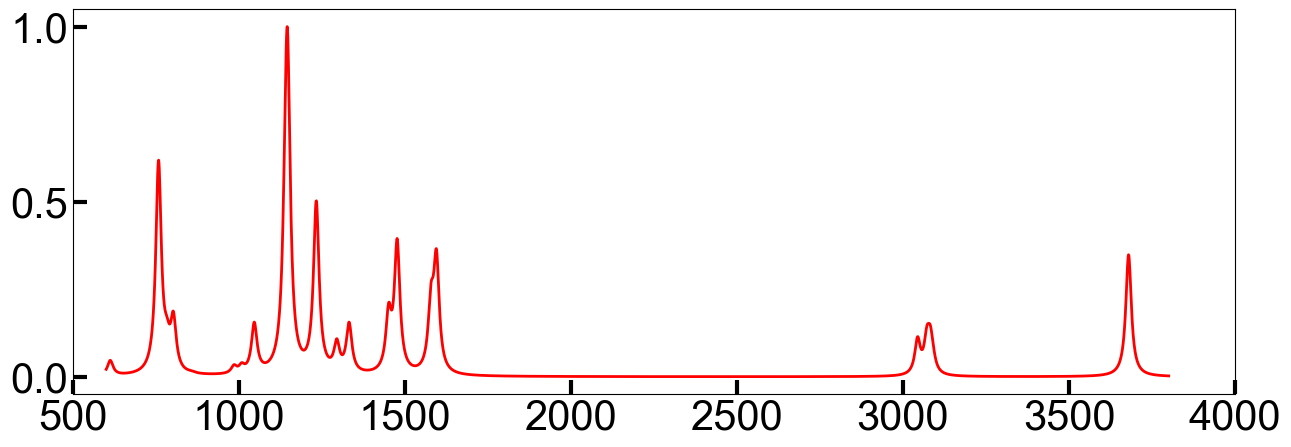

In [20]:
'''draw ir spectrum'''
plt.figure(figsize=(15,5))
plt.rc('font',family='Arial', size=30)
plt.plot(x,yir/yir.max(),lw=2,label='IR',color='r')
plt.xlim(500,4000)
plt.tick_params(labelsize=30,width=3,length=10)
plt.show()

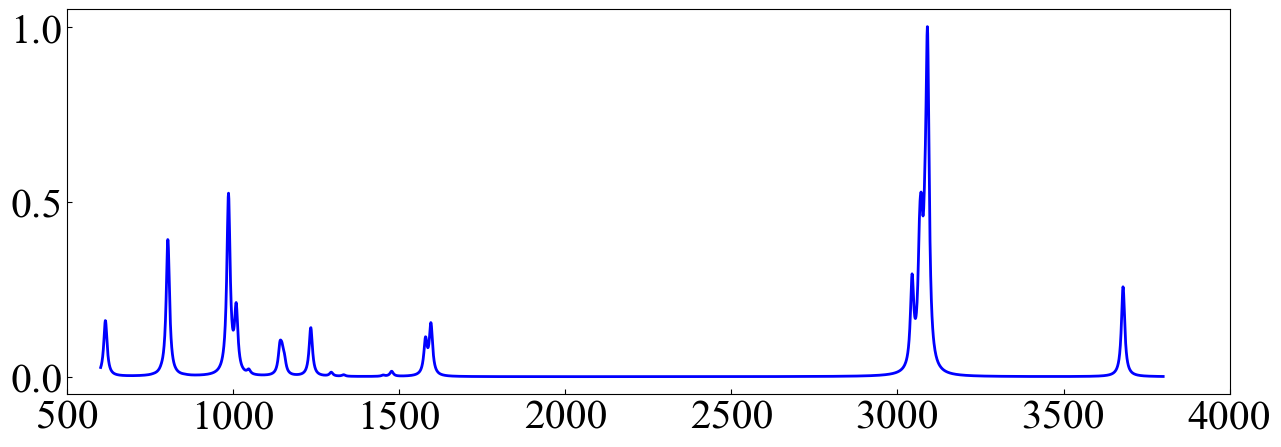

In [10]:
'''draw raman spectrum'''
plt.figure(figsize=(15,5))
plt.rc('font',family='Times New Roman', size=30)
plt.xlim(500,4000)
plt.plot(x,yraman/yraman.max(),lw=2,label='Raman',color='blue')

In [11]:
'''Calculate NMR Shift of C and H atom'''
sc,sh=nmr_model(pos=pos,z=z)

sc,sh

(tensor([[163.2916],
         [117.0863],
         [134.3739],
         [124.6024],
         [135.7667],
         [120.1776]], grad_fn=<AddBackward0>),
 tensor([[3.3317],
         [6.6368],
         [7.3450],
         [6.9707],
         [7.3930],
         [7.1397]], grad_fn=<AddBackward0>))

In [12]:
'''Aggregation of hydrogen and carbon from the same chemical environment
in index,all hydrogen atoms and carbon atoms in the same chemical environment are represented by same number
    
'''
indexc=torch.LongTensor([0,1,2,3,2,1])
indexh=torch.LongTensor([0,1,2,3,2,1])
shiftc,intc,shifth,inth=nmr_sca(sc.reshape(-1),sh.reshape(-1),indexc,indexh)

In [13]:
'''Broadening of nmr shift and intensity'''
xh=torch.linspace(0, 12, 1201)
xc=torch.linspace(0,300,3001)
yc=Lorenz_broadening(shiftc,intc,c=xc,sigma=1).detach().numpy()
yh=Lorenz_broadening(shifth,inth,c=xh,sigma=0.05).detach().numpy()

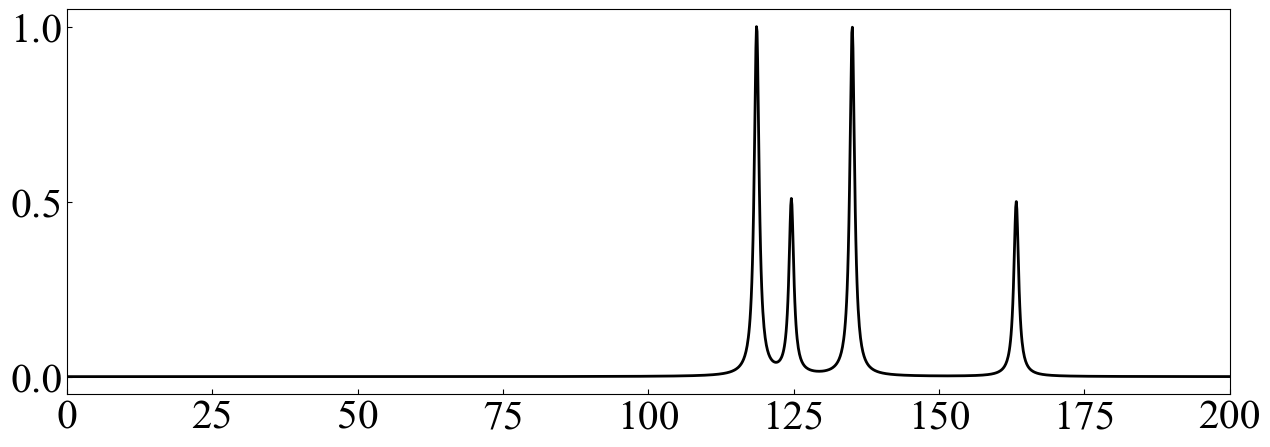

In [14]:
'''draw nmrc spectrum'''
plt.figure(figsize=(15,5))
plt.xlim(0,200)
plt.plot(xc,yc/yc.max(),lw=2,label='NMRC13',color='black')

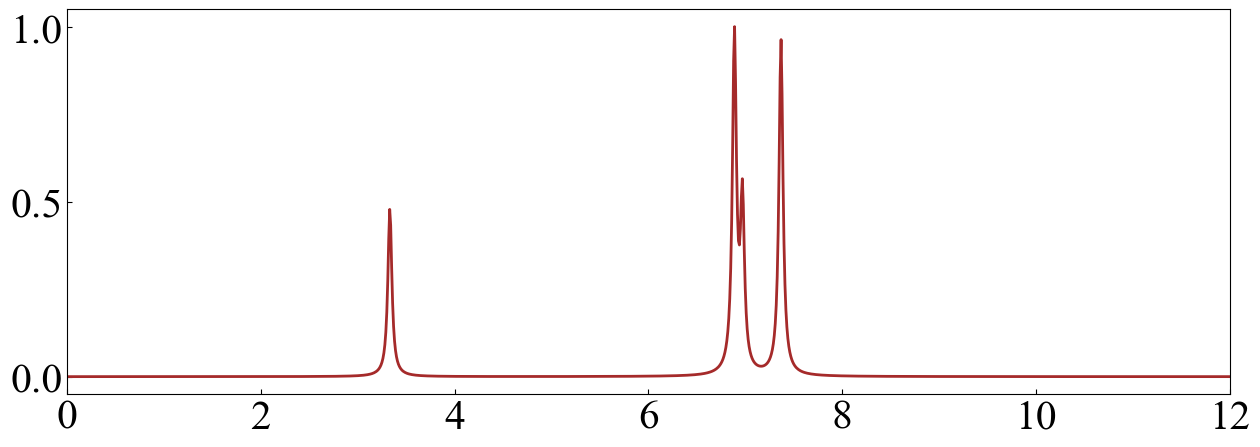

In [15]:
'''draw nmrh spectrum'''
plt.figure(figsize=(15,5))
plt.xlim(0,12)
plt.plot(xh,yh/yh.max(),lw=2,label='NMRH1',color='brown')

In [16]:
'''calculate uv spectrum'''
uv=uv_model_(z=z,pos=pos).detach().numpy()

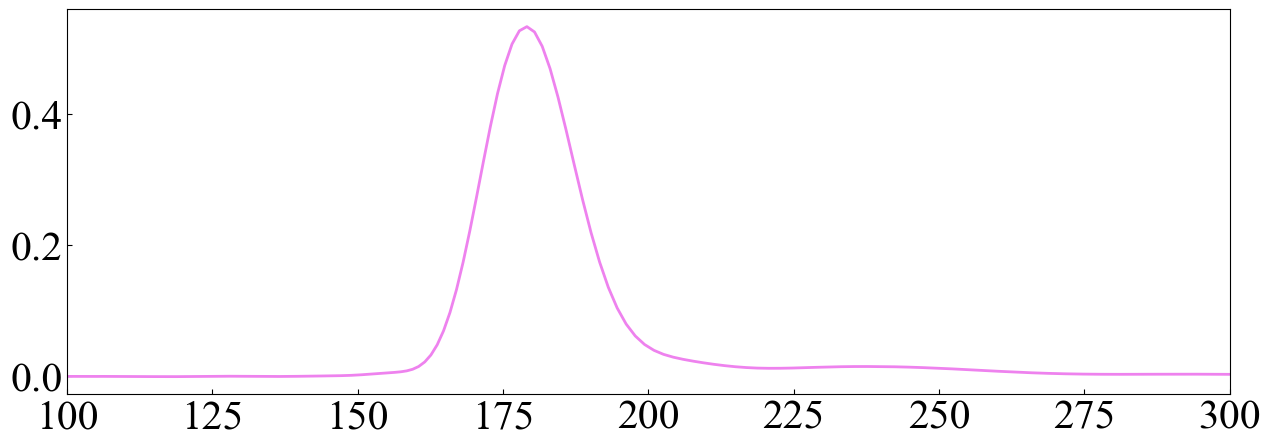

In [17]:
'''draw uv spectrum'''
xuv=1239.85/torch.linspace(1.5,13.5,240).detach().numpy()
plt.figure(figsize=(15,5))
plt.rc('font',family='Times New Roman', size=30)
plt.xlim(100,300)
plt.plot(xuv,uv,lw=2,color='Violet')